In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
from keras.models import load_model

In [9]:
model = load_model('hwd_model.h5')

In [10]:
cam = cv2.VideoCapture(0)
cv2.namedWindow("test")

img_counter=0

while True:
    ret,frame=cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test",frame)
    
    k= cv2.waitKey(1)
    if k%256==27:
        #ESC pressed
        print("Escape hit,closing...")
        break
    elif k%256==32:
        #space pressed
        img_name="test{}.png".format(img_counter)
        cv2.imwrite(img_name,frame)
        print("{}written!".format(img_name))
        img_counter +=1
        
cam.release()

cv2.destroyAllWindows()

test0.pngwritten!
test1.pngwritten!
test2.pngwritten!
Escape hit,closing...


In [13]:
def predict_image(image_data):
    data = Image.open(image_data)
    data = data.convert('L')
    data = data.point(lambda x:0 if x<100 else 255)
    data = data.save('saved_image.jpg')
    data = cv2.imread('saved_image.jpg',cv2.IMREAD_GRAYSCALE)
    data = cv2.bitwise_not(data)
    data = cv2.resize(data,(28,28))
    data = data/255
    plt.imshow(data,cmap='gray')
    data = data.reshape(1,28,28)
    predict = model.predict(data)
    predicted_class = np.argmax(predict)
    score = np.amax(predict)
    print(f'Prediction Report:\nPredicted class:{predicted_class}\nConfidence level:{score:.2%}')

1/1 [==============================] - 0s 31ms/step
Prediction Report:
Predicted class:3
Confidence level:100.00%


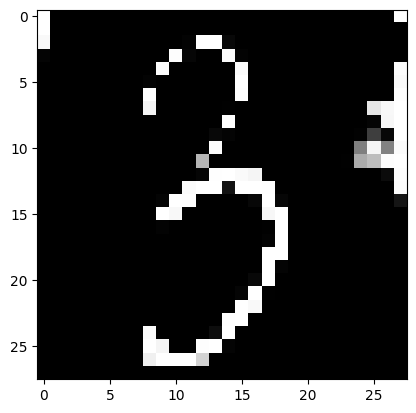

In [14]:
predict_image('test0.png')